<a href="https://colab.research.google.com/github/trinhvanypro1/-DataAnalystDeepLearning/blob/main/Lab7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
#Hàm để hiển thị các tấm ảnh
import matplotlib.pyplot as plt
# Chọn ngẫu nhiên các tấm ảnh
import random
#Load dữ liệu trong tập mẫu
from keras.datasets import mnist
# các hàm sau để xây dựng mô hình neural
#Thêm 1 lớp, thêm hàm kích hoạt 
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers.core import Dense,Activation

***Loading Training Data:***


In [3]:
# Tập dữ liệu huấn luyện và tập test được load từ hàm load_data
# x là dữ liệu của bức ảnh, y là kết quả ảnh là chữ số mấy
(x_train, y_train),(x_test,y_test)=mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
# Dữ liệu trong tập data mnist là 60000 tấm ảnh trắng đen có kích thước 28x28px
# Mỗi px có giá trị từ 0-255, 0 là màu đen và 255 là màu sáng
#Xem shape của tập train với kết quả ta nhận thấy có 60000 tấm ảnh trong tập train, kích thước 28x28px
print('x_train shape: ',x_train.shape)

x_train shape:  (60000, 28, 28)


In [5]:
# Vì tập dữ liệu mnist được lưu ở dạng ma trận 2 chiều 28x28px
# nên trước khi truyền vào mạng neural cần chuyển sang dạng vector
x_train=x_train.reshape(60000,784)
x_train=x_train.astype('float32')
# Chuẩn hóa dữ liệu nằm trong khoảng 0-1 nên chia cho 255
x_train /= 255

In [6]:
# Vì dữ liệu mnist được lưu ở dạng ma trận 2 chiều 28x28px
#nên trước khi truyền vào neural cần chuyển sang dạng vector
#tập test chỉ chứa 10000 tấm ảnh
x_test=x_test.reshape(10000,784)
x_test=x_test.astype('float32')
x_test /= 255

In [7]:
# Vì đầu ra của mạng neural là nhận dạng một tấm ảnh thuộc 1 trong các lớp 0-9
# nên ta dùng hàm này để gán các giá trị kết quả cho tập y_test
nb_class=10
y_train = np_utils.to_categorical(y_train,nb_class)
y_test = np_utils.to_categorical(y_test,nb_class)

In [8]:
# Tạo model
model = Sequential()
# add vào lớp input, 10 neural với mỗi neural có 784 input
model.add(Dense(10,input_shape=(784,)))
model.add(Activation('relu'))

In [9]:
# add vào lớp hiden sẽ tự động lấy đầu vào của lớp đầu, giá trị hiden có thể thay đổi
model.add(Dense(40))
model.add(Activation('relu'))

In [10]:
#add vào lớp ouput bắt buộc là 10 vì 0-9 là 10 số
model.add(Dense(10))
#dùng hàm softmax vì đầu ra là 10 lớp
model.add(Activation('softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                7850      
_________________________________________________________________
activation (Activation)      (None, 10)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 40)                440       
_________________________________________________________________
activation_1 (Activation)    (None, 40)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                410       
_________________________________________________________________
activation_2 (Activation)    (None, 10)                0         
Total params: 8,700
Trainable params: 8,700
Non-trainable params: 0
______________________________________________________

In [11]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop',metrics=['accuracy'])

In [12]:
# Mỗi lần lấy 128 tấm ảnh để train
model.fit(x_train,y_train,batch_size=128,epochs=5)

Epoch 1/5
469/469 [==============================] - 2s 2ms/step - loss: 0.6318 - accuracy: 0.8201
Epoch 2/5
469/469 [==============================] - 1s 2ms/step - loss: 0.3022 - accuracy: 0.9128
Epoch 3/5
469/469 [==============================] - 1s 2ms/step - loss: 0.2652 - accuracy: 0.9244
Epoch 4/5
469/469 [==============================] - 1s 2ms/step - loss: 0.2440 - accuracy: 0.9305
Epoch 5/5
469/469 [==============================] - 1s 2ms/step - loss: 0.2269 - accuracy: 0.9349


In [15]:
#Dự báo mô hình, giá trị dự báo được lưu vào biến predicted_class
#Giá trị thực tế được lưu ở tập t_test
predicted_classes=model.predict(x_test)

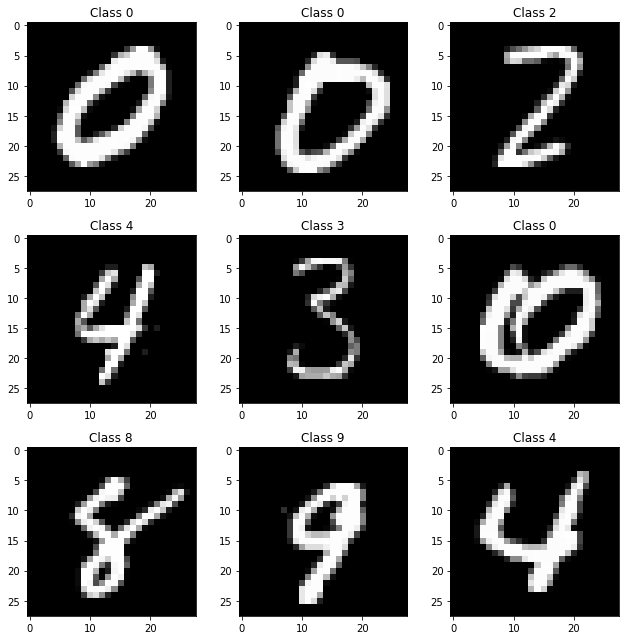

In [19]:
#Hiển thị 9 tấm ảnh ngẫu nhiên trong tập test
#Hiển thị kết quả dự báo của 9 tấm ảnh này theo mô hình neural vừa xây dựng
plt.rcParams['figure.figsize']=(9,9)
for i in range(9):
  plt.subplot(3,3,i+1)
  num=random.randint(0,len(x_test))
  plt.imshow(x_test[num].reshape(28,28),cmap='gray',interpolation=None)
  plt.title('Class {}'.format(predicted_classes[num].argmax()))
plt.tight_layout()